In [348]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns

In [349]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Price Prediction/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [350]:
def univariate_stats(df):
    df_output = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Numeric', 'Mode', 'Mean', 'Min', '25%', 'Median',
                                     '75%', 'Max', 'Std', 'Skew', 'Kurt'])
    for col in df:
        count = df[col].count()
        missing = df[col].isnull().sum()
        unique = df[col].nunique()
        dtype = df[col].dtype
        mode = df[col].mode().values[0]
        if pd.api.types.is_numeric_dtype(df[col]):
            mean = df[col].mean()
            min = df[col].min()
            quantile25 = df[col].quantile(0.25)
            median = df[col].median()
            quartile75 = df[col].quantile(0.75)
            max_val = df[col].max()
            std = df[col].std()
            skew = df[col].skew()
            kurt = df[col].kurt()
            df_output.loc[col] = [count, missing, unique, dtype,pd.api.types.is_numeric_dtype(df[col]),mode,
                                  mean, min,quantile25, median, quartile75,max_val,std,skew,kurt]
        else:
            df_output.loc[col] = [count, missing, unique, dtype,pd.api.types.is_numeric_dtype(df[col]),mode,
                                  '-','-','-','-','-','-','-','-','-']
    return df_output.sort_values(by = ['Numeric', 'Skew', 'Unique'], ascending=False)

univariate_stats(df)

,Count,Missing,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
bathrooms,545,0,4,int64,True,1,1.286239,1,1.0,1.0,2.0,4,0.50247,1.589264,2.164856
area,545,0,284,int64,True,6000,5150.541284,1650,3600.0,4600.0,6360.0,16200,2170.141023,1.321188,2.75148
price,545,0,219,int64,True,3500000,4766729.247706,1750000,3430000.0,4340000.0,5740000.0,13300000,1870439.615657,1.212239,1.96013
stories,545,0,4,int64,True,2,1.805505,1,1.0,2.0,2.0,4,0.867492,1.082088,0.679404
parking,545,0,4,int64,True,0,0.693578,0,0.0,0.0,1.0,3,0.861586,0.842062,-0.573063
bedrooms,545,0,6,int64,True,3,2.965138,1,2.0,3.0,3.0,6,0.738064,0.495684,0.728323
furnishingstatus,545,0,3,object,False,semi-furnished,-,-,-,-,-,-,-,-,-
mainroad,545,0,2,object,False,yes,-,-,-,-,-,-,-,-,-
guestroom,545,0,2,object,False,no,-,-,-,-,-,-,-,-,-
basement,545,0,2,object,False,no,-,-,-,-,-,-,-,-,-


In [351]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [352]:
catergorical_columns = df.select_dtypes(include=['object']).columns
df[catergorical_columns].describe().T

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


In [353]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [354]:
df.duplicated().sum()

0

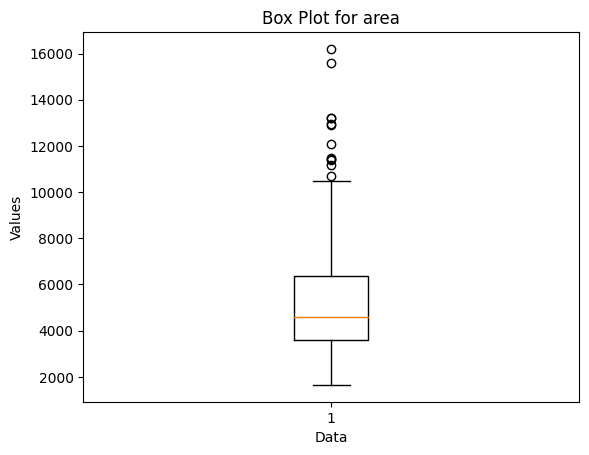

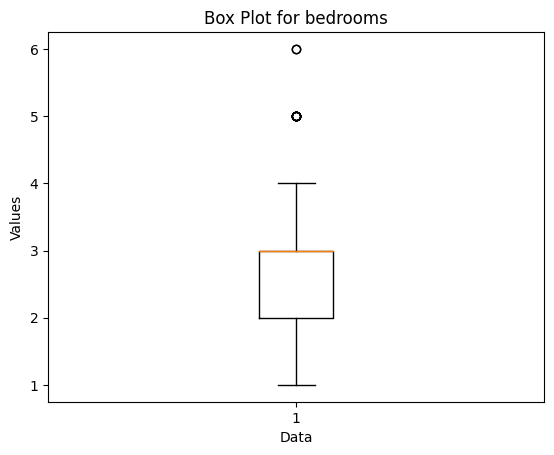

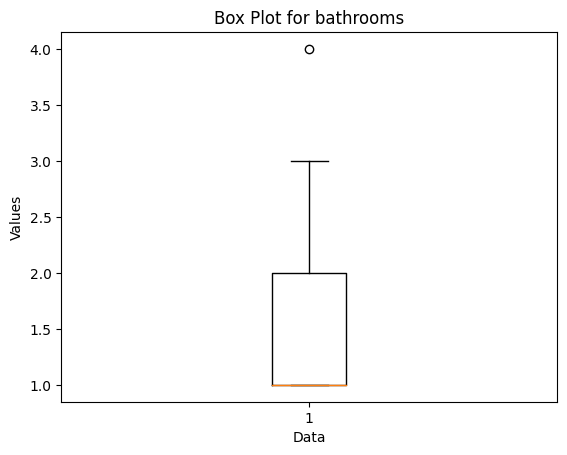

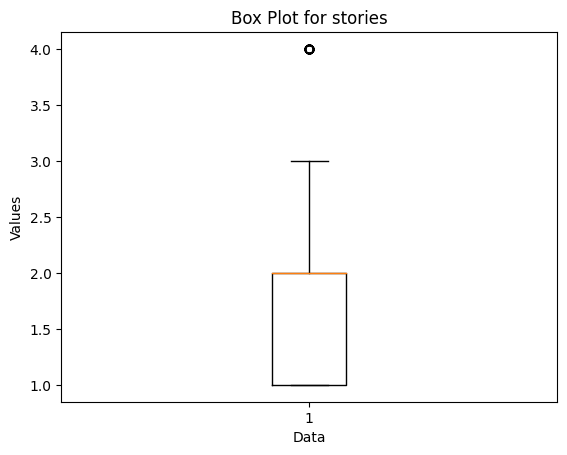

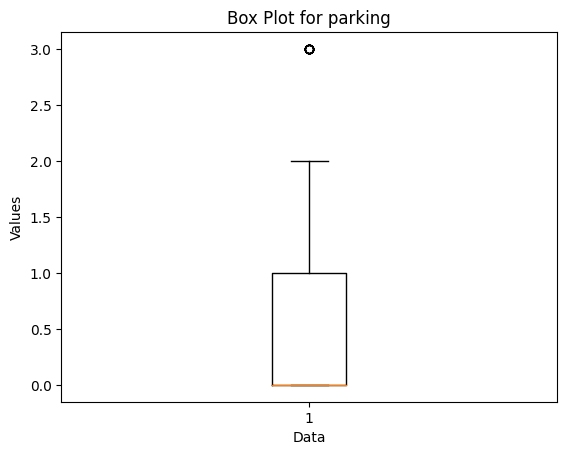

In [355]:
def boxplot_num(col):
  plt.boxplot(df[col])
  plt.title(f'Box Plot for {col}')
  plt.xlabel('Data')
  plt.ylabel('Values')
  plt.show()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
  if col != 'price':
    boxplot_num(col)

In [356]:
df['Z-Score'] = (df['area'] - df['area'].mean()) / df['area'].std()
outliers = df[np.abs(df['Z-Score']) > 3]

outliers

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Z-Score
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,5.091586
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,3.709187
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished,3.709187
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished,3.197699
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished,4.815106
211,4900000,12900,3,1,1,yes,no,no,no,no,2,no,furnished,3.570947
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished,3.591222


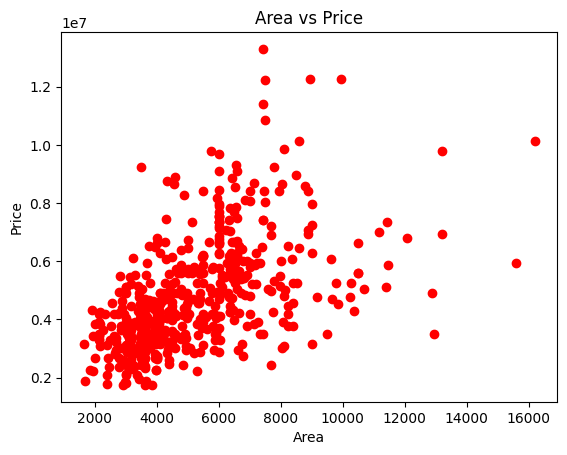

In [357]:
plt.plot(df['area'], df['price'], 'ro')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

In [358]:
def barPlot(col):
  feature = df[col].value_counts().sort_index()
  feature.plot(kind='bar')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=0)
  plt.title(f'Bar Plot for {col}')
  plt.show()

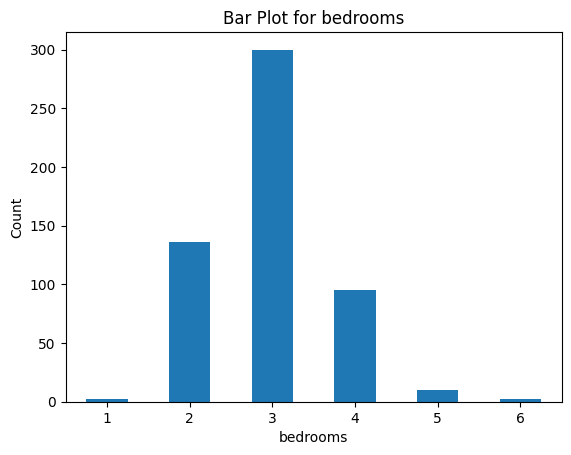

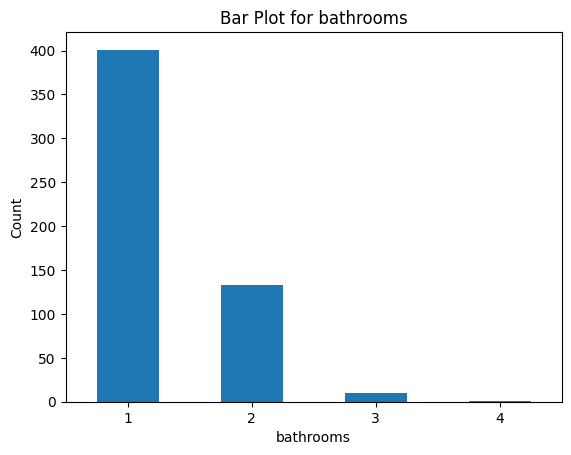

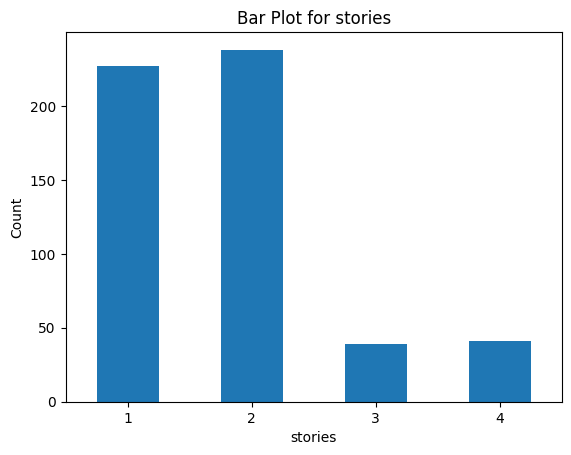

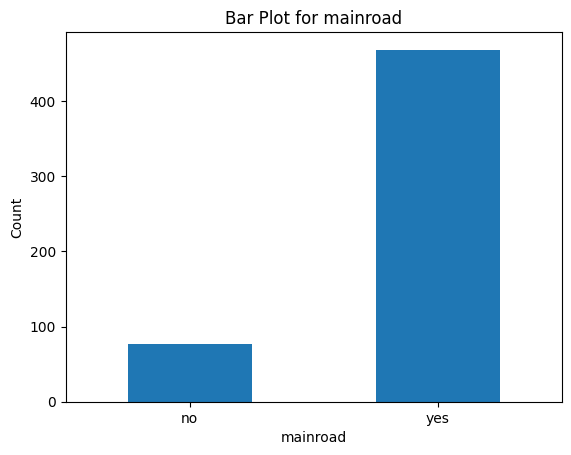

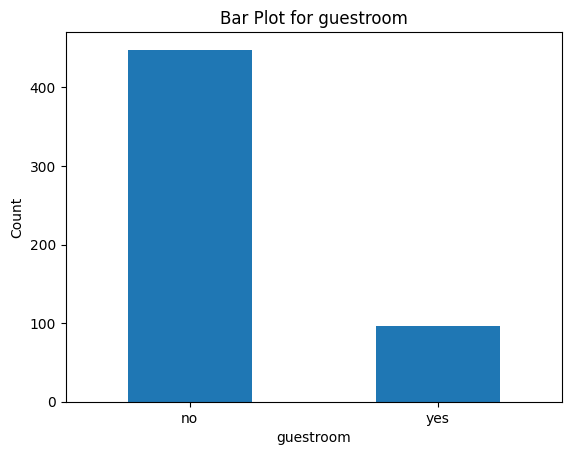

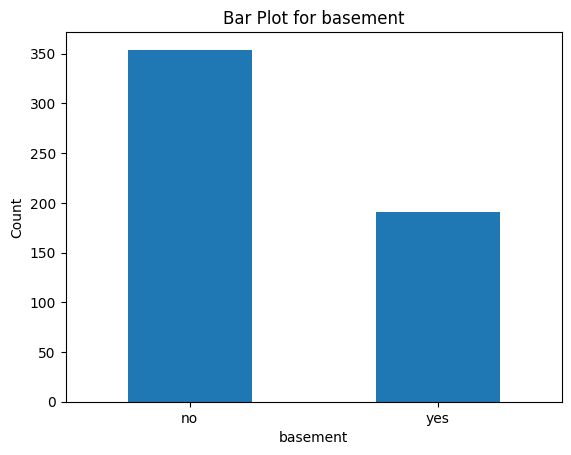

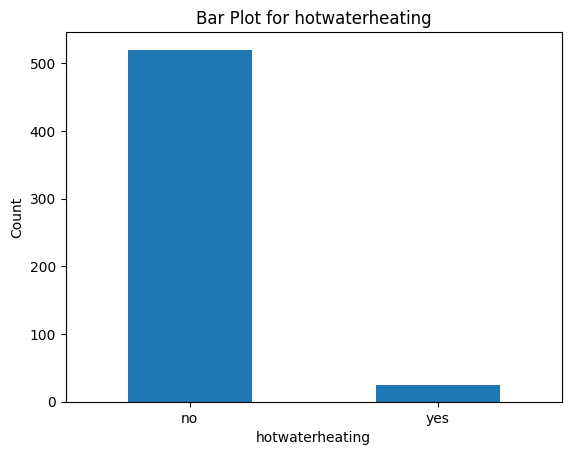

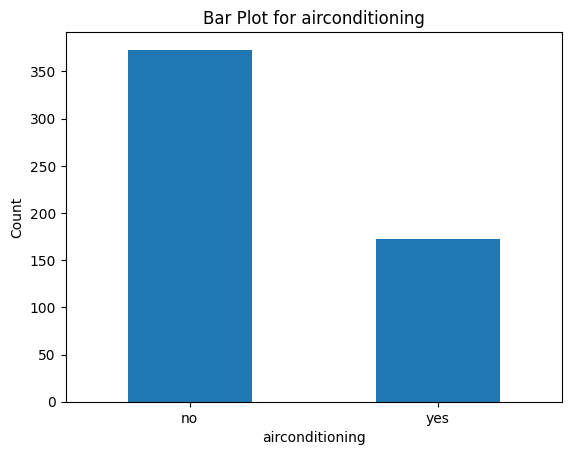

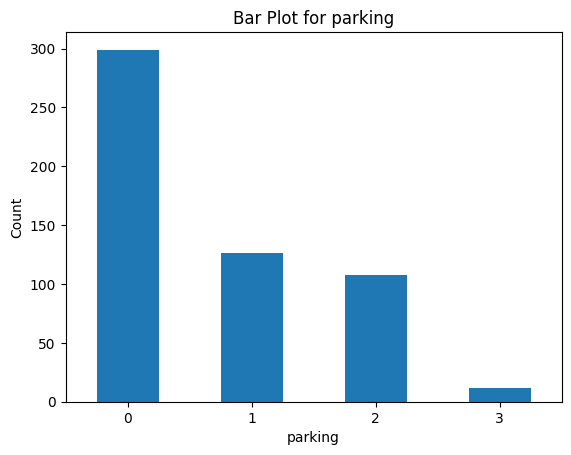

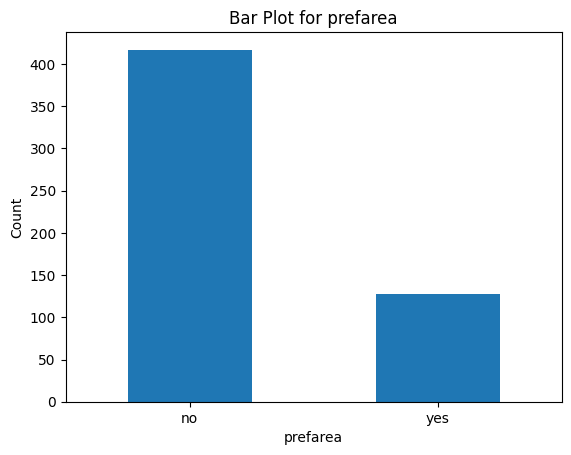

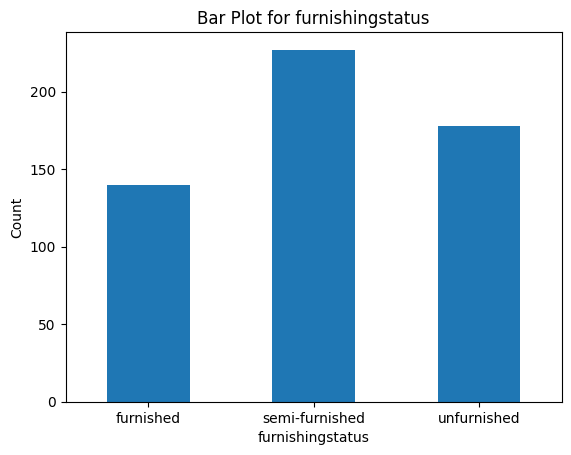

In [359]:
columns = ['bedrooms',	'bathrooms',	'stories',	'mainroad',	'guestroom',	'basement',	'hotwaterheating',
           'airconditioning',	'parking', 'prefarea',	'furnishingstatus']
for col in columns:
  barPlot(col)

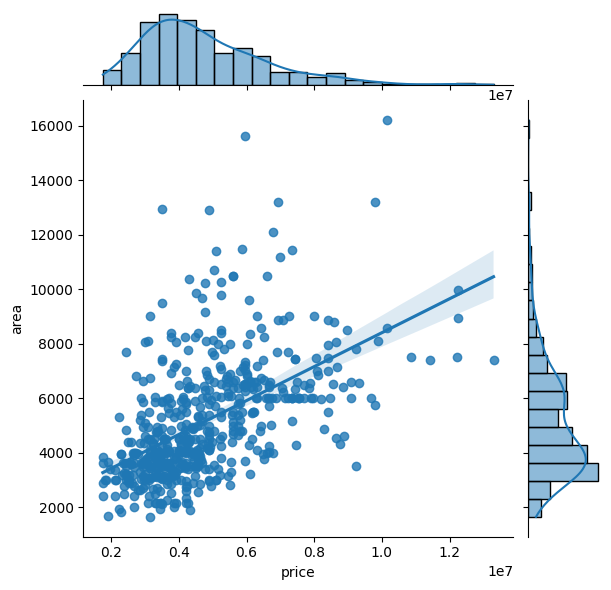

In [360]:
ax = sns.jointplot(x = df['price'], y = df['area'], kind = 'reg');
plt.show()

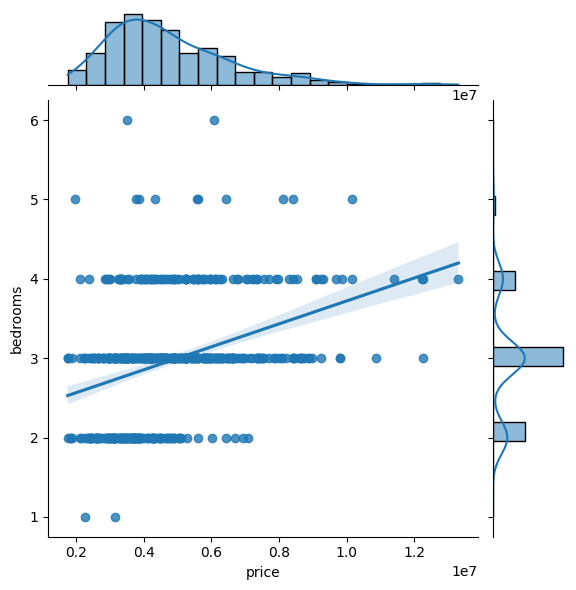

In [361]:
sns.jointplot(x=df['price'], y=df['bedrooms'], kind='reg')

In [362]:
df_no_outliers = df[df['Z-Score'] <= 3]

df_no_outliers = df_no_outliers.drop('Z-Score', axis=1)

df_no_outliers = df[(df['bedrooms'] < 6)]

In [364]:
x = df_no_outliers.drop('price', axis=1)
y = df_no_outliers['price']

In [365]:
x['area'] = np.log(x['area'])
x['bedrooms'] = np.log(x['bedrooms'])
y = np.log1p(y)

In [366]:
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Use drop='first' to avoid multicollinearity

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


In [367]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'Z-Score'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [368]:
y_pred = model_pipeline.predict(X_test)

In [369]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.043113785246230274
R-squared: 0.672566307709406
